@Author: Pooja
@Date: 11-11-2024
@Last modified by: Pooja
@Last modified Date: 11-11-2024
@Title: simple linear regressiopn to predict salary based on yearsofexperience

importing libraries and dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


visualising dataset

Text(0, 0.5, 'Salary')

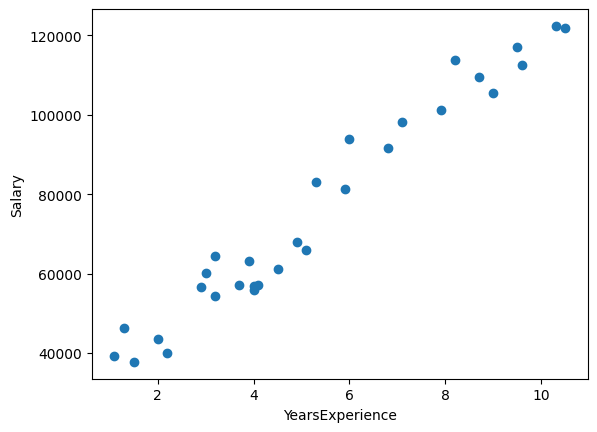

In [41]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

seperating dependent and independent columns

ValueError: num must be an integer with 1 <= num <= 6, not 7

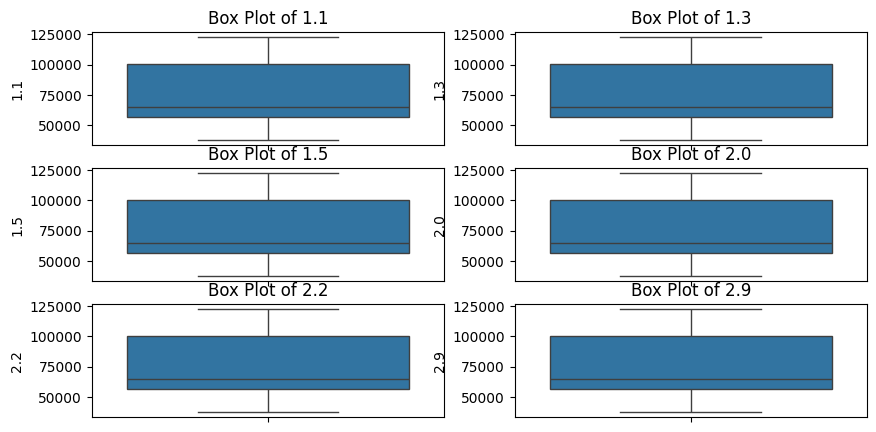

In [47]:
#detecting outliers
plt.figure(figsize=(10, 5))
for i, feature in enumerate(df['YearsExperience']):
    plt.subplot(3, 2, i+1)  # Creating a subplot for each feature
    sns.boxplot(y=df['Salary'])  # Create a boxplot
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout
plt.show()

In [24]:
x = df.iloc[:,:-1]# yearsofExperience [input variable]
y = df.iloc[:,-1]# salary [target variable]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


splitting data to train and test data 

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

create linear regression model and train

In [37]:
from sklearn.linear_model import LinearRegression
re = LinearRegression()
re.fit(x_train,y_train)


LinearRegression()

predicting output

In [27]:
y_pred = re.predict(x_test)
y_pred

array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

In [28]:
y_test

1     46205.0
0     39343.0
14    61111.0
9     57189.0
21    98273.0
19    93940.0
Name: Salary, dtype: float64

testing model accuracy

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"The accuracy of our model is",score)
print(mse)

The accuracy of our model is 0.8886956733784565
56137509.9978255


visualising after prediction

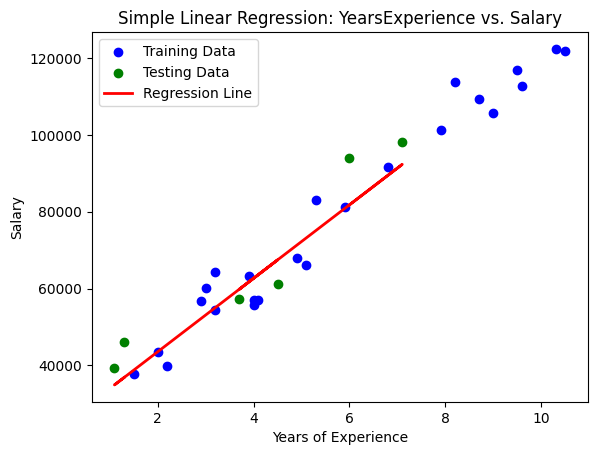

In [60]:
plt.scatter(x_train, y_train, color='blue', label="Training Data")
plt.scatter(x_test, y_test, color='green', label="Testing Data")
plt.plot(x_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression: YearsExperience vs. Salary")
plt.legend()
plt.show()